# Transport Price Analysis

## 1. Import libraries and load dataset

In [1]:
#!/usr/bin/python

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

conn = sqlite3.connect('shipments.db')
print("Opened database successfully")


Opened database successfully


In [2]:

df = pd.read_sql("select c.ID, c.Carrier, sc.FreightCost_total, sw.Weight from (Shipment_Weight sw join Shipment_Cost sc on sw.ID=sc.FK_ShipmentID) join Carrier_Master c ON sw.FK_CarrierID=c.ID;", con=conn)    




## 2. Data Wrangling


Data wrangling in python deals with the below functionalities.
1. Data exploration
2. Dealing with missing values
3. Reshaping data

In [3]:
#1. Data exploration:
#We will use Carrier ID, Carrier, FreightCost_total and Weight from db after joining operation.
df.head()

,ID,Carrier,FreightCost_total,Weight
0,1,Freight Ltd.,6095.221734,"2038,78915712337"
1,1,Freight Ltd.,7245.051522,"2193,04361425112"
2,1,Freight Ltd.,6864.733370,"2282,50958929844"
3,1,Freight Ltd.,5816.134076,"1825,0098778031"
4,1,Freight Ltd.,6161.641984,"1955,5957999776"


In [4]:
df.columns.tolist()

['ID', 'Carrier', 'FreightCost_total', 'Weight']

## 2.3. Check for missing values

In [5]:
#2. Dealing with missing values
df.isnull().sum()

ID                   0
Carrier              0
FreightCost_total    0
Weight               0
dtype: int64

We can observe that now there are no missing values in columns.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 450 non-null    int64  
 1   Carrier            450 non-null    object 
 2   FreightCost_total  450 non-null    float64
 3   Weight             450 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 14.2+ KB


We can observe that those columns that have symbols are in object, float and int form.

In [7]:
#Checking for wrong entries like symbols -,?,#,*,etc.
for col in df.columns:
    print('{} : {}'.format(col,df[col].unique()))

ID : [1 2]
Carrier : ['Freight Ltd.' 'Speedport']
FreightCost_total : [6095.22173384 7245.05152201 6864.73337009 5816.13407636 6161.64198363
 5801.51892155 6721.27702486 6102.88870464 6232.9750779  6525.75536081
 6602.21459261 6478.85390859 5904.57824863 7526.87946998 6502.20121206
 7268.77329583 5944.0717862  7044.07612628 6494.75411089 6291.42069996
 7383.48290716 5756.25073457 5719.09437453 7058.60595607 6437.34061108
 6653.67362845 5678.68361543 6136.74504159 7139.52175749 6294.13493889
 7317.16304565 6279.60078437 5527.58652242 7030.8902564  6468.93219424
 7910.42797399 7210.05096231 6177.58249695 6389.24170696 5953.1245691
 7632.16690611 5846.22974095 7839.98185962 6879.67047543 7478.81161488
 5976.5320082  5369.31013071 5767.18896518 5563.48951247 4551.98083348
 5970.48160443 6922.12228086 6351.59902641 5924.70376677 7025.16757787
 6121.41790577 6416.22835192 6639.20022141 5577.72133785 6327.28280642
 5781.50707568 7668.48227926 5687.94525197 5385.23856853 6054.71334721
 5606.31

There are null values in our dataset in form of -,?,#,*,etc

### 2.4. Data Types and Normalizing the Data

In [8]:
df.shape

(450, 4)

In [9]:
#replace , with . to convert string to float correctly
df.Weight = df.Weight.apply(lambda x: x.replace(',','.'))
df

,ID,Carrier,FreightCost_total,Weight
0,1,Freight Ltd.,6095.221734,2038.78915712337
1,1,Freight Ltd.,7245.051522,2193.04361425112
2,1,Freight Ltd.,6864.733370,2282.50958929844
3,1,Freight Ltd.,5816.134076,1825.0098778031
4,1,Freight Ltd.,6161.641984,1955.5957999776
...,...,...,...,...
445,2,Speedport,5744.775290,1631.41809931932
446,2,Speedport,4656.522543,1335.38352861943
447,2,Speedport,5037.629227,1366.51912161959
448,2,Speedport,6030.712627,1839.84879391607


The type of weight column is str. We need to calculate cost per kg in next steps so we need to convert str to float for weight column.

In [10]:
floatizer = lambda x: float(x)
df.Weight = df.Weight.apply(floatizer)
df

,ID,Carrier,FreightCost_total,Weight
0,1,Freight Ltd.,6095.221734,2038.789157
1,1,Freight Ltd.,7245.051522,2193.043614
2,1,Freight Ltd.,6864.733370,2282.509589
3,1,Freight Ltd.,5816.134076,1825.009878
4,1,Freight Ltd.,6161.641984,1955.595800
...,...,...,...,...
445,2,Speedport,5744.775290,1631.418099
446,2,Speedport,4656.522543,1335.383529
447,2,Speedport,5037.629227,1366.519122
448,2,Speedport,6030.712627,1839.848794


In the below part, I have normalized Freight Cost and Weight column because of the long numbers.

In [11]:
normalized_df = df
normalized_df.FreightCost_total=(df.FreightCost_total-df.FreightCost_total.min())/(df.FreightCost_total.max()-df.FreightCost_total.min())
normalized_df.Weight=(df.Weight-df.Weight.min())/(df.Weight.max()-df.Weight.min())
normalized_df

,ID,Carrier,FreightCost_total,Weight
0,1,Freight Ltd.,0.619431,0.706636
1,1,Freight Ltd.,0.818812,0.789558
2,1,Freight Ltd.,0.752864,0.837651
3,1,Freight Ltd.,0.571037,0.591717
4,1,Freight Ltd.,0.630948,0.661915
...,...,...,...,...
445,2,Speedport,0.558664,0.487649
446,2,Speedport,0.369961,0.328512
447,2,Speedport,0.436045,0.345250
448,2,Speedport,0.608245,0.599694


In [12]:
#check normalized dataframe if it includes negative values or nonnegative values
col = ["FreightCost_total", "Weight"]
(normalized_df["FreightCost_total"] < 0).any()

False

In [13]:
#check normalized dataframe if it includes negative values or nonnegative values
(normalized_df["Weight"] < 0).any()

False

The normalized columns don't have negative values as shown above lines. In the next step, the cost per kg will be calculated. I wasn't sure about the unit of weight. I have applied it by accepting kg.

In [14]:
normalized_df['cost_pr_kg'] = normalized_df['FreightCost_total']/normalized_df['Weight']
normalized_df

,ID,Carrier,FreightCost_total,Weight,cost_pr_kg
0,1,Freight Ltd.,0.619431,0.706636,0.876591
1,1,Freight Ltd.,0.818812,0.789558,1.037051
2,1,Freight Ltd.,0.752864,0.837651,0.898780
3,1,Freight Ltd.,0.571037,0.591717,0.965052
4,1,Freight Ltd.,0.630948,0.661915,0.953217
...,...,...,...,...,...
445,2,Speedport,0.558664,0.487649,1.145626
446,2,Speedport,0.369961,0.328512,1.126170
447,2,Speedport,0.436045,0.345250,1.262983
448,2,Speedport,0.608245,0.599694,1.014260


In [15]:
normalized_df = normalized_df.sort_values(by = "cost_pr_kg")
normalized_df

,ID,Carrier,FreightCost_total,Weight,cost_pr_kg
408,2,Speedport,0.062028,0.098814,0.627730
123,1,Freight Ltd.,0.488610,0.657067,0.743622
275,1,Freight Ltd.,0.496511,0.667105,0.744278
170,1,Freight Ltd.,0.345816,0.464400,0.744650
96,1,Freight Ltd.,0.284788,0.380054,0.749336
...,...,...,...,...,...
312,2,Speedport,0.162645,0.118833,1.368691
444,2,Speedport,0.159375,0.112590,1.415527
336,2,Speedport,0.405164,0.278990,1.452254
425,2,Speedport,0.199965,0.137288,1.456537


In [16]:
normalized_df.isnull().sum()

ID                   0
Carrier              0
FreightCost_total    0
Weight               0
cost_pr_kg           1
dtype: int64

As shown in the below two lines, our dataset includes 0 and null value. These values will be removed in the next step.

In [17]:
normalized_df = normalized_df.dropna()
normalized_df = normalized_df.loc[~(normalized_df==0).all(axis=1)]
normalized_df

,ID,Carrier,FreightCost_total,Weight,cost_pr_kg
408,2,Speedport,0.062028,0.098814,0.627730
123,1,Freight Ltd.,0.488610,0.657067,0.743622
275,1,Freight Ltd.,0.496511,0.667105,0.744278
170,1,Freight Ltd.,0.345816,0.464400,0.744650
96,1,Freight Ltd.,0.284788,0.380054,0.749336
...,...,...,...,...,...
321,2,Speedport,0.294068,0.218672,1.344791
312,2,Speedport,0.162645,0.118833,1.368691
444,2,Speedport,0.159375,0.112590,1.415527
336,2,Speedport,0.405164,0.278990,1.452254


In [18]:
#normalized_df['Weight'] = normalized_df['Weight'].astype(str)
#normalized_df

In the below line, the weight column is converted to str type because the weight will be string type in the visualization step. I have checked the null values in the dataset for the next operation.

In [19]:
normalized_df.isnull().sum()

ID                   0
Carrier              0
FreightCost_total    0
Weight               0
cost_pr_kg           0
dtype: int64

## 3. Statistical Analysis

In [20]:
normalized_df.describe()

,ID,FreightCost_total,Weight,cost_pr_kg
count,449.000000,449.000000,449.000000,449.000000
mean,1.331849,0.595540,0.606975,0.999802
std,0.471402,0.162613,0.178742,0.130112
min,1.000000,0.062028,0.098814,0.627730
25%,1.000000,0.503189,0.501738,0.912493
50%,1.000000,0.607069,0.641575,0.983712
75%,2.000000,0.706268,0.734113,1.071144
max,2.000000,1.000000,1.000000,1.456537


In [21]:
normalized_df.min()

ID                              1
Carrier              Freight Ltd.
FreightCost_total        0.062028
Weight                   0.098814
cost_pr_kg                0.62773
dtype: object

In [22]:
normalized_df.max()

ID                           2
Carrier              Speedport
FreightCost_total          1.0
Weight                     1.0
cost_pr_kg            1.456537
dtype: object

Freight Ltd. provides the cheapest transport price per kg when we look into output in the above. For the cheapest transport price, the value of Fright cost is 0.062 nearly. The carriers don't grant a discount on heavy shipments. Because I have observed that the cost per kg in the data set increases in proportion to the weight.

## 4. Analytical Questions and Visualizations

### 4.1 How does the Weight affect the Total Freight Cost?

Text(0, 0.5, 'FreightCost_total')

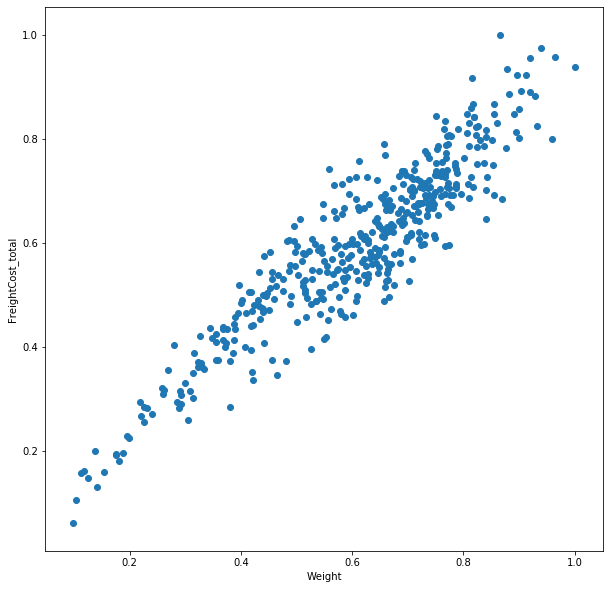

In [23]:
plt.figure(figsize=(10,10))
plt.scatter(x='Weight',y='FreightCost_total',data=normalized_df)
plt.xlabel('Weight')
plt.ylabel('FreightCost_total')

According to this graph, We can see that most of the Freight Cost value lies between 0.4 and 0.6. The max Freight cost was observed in the high weights. There are some outliers below 0.2 (Freight Cost) and for the small weights in the data set. The outliers can be removed with quantile range in the data processing. I have used float type of weight to observe better in this graph.